# STATS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
season = pd.read_csv('understat.csv')
game = pd.read_csv('understat_per_game.csv')

In [3]:
# setting up season
dfs = season.copy()
dfs.rename({season.columns[0]:'league',season.columns[1]:'year'},axis=1,inplace=True)

In [4]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        684 non-null    object 
 1   year          684 non-null    int64  
 2   position      684 non-null    int64  
 3   team          684 non-null    object 
 4   matches       684 non-null    int64  
 5   wins          684 non-null    int64  
 6   draws         684 non-null    int64  
 7   loses         684 non-null    int64  
 8   scored        684 non-null    int64  
 9   missed        684 non-null    int64  
 10  pts           684 non-null    int64  
 11  xG            684 non-null    float64
 12  xG_diff       684 non-null    float64
 13  npxG          684 non-null    float64
 14  xGA           684 non-null    float64
 15  xGA_diff      684 non-null    float64
 16  npxGA         684 non-null    float64
 17  npxGD         684 non-null    float64
 18  ppda_coef     684 non-null    

In [5]:
dfs['league'].drop_duplicates()

0         La_liga
120           EPL
240    Bundesliga
348       Serie_A
468       Ligue_1
588          RFPL
Name: league, dtype: object

In [6]:
leagues_in_focus = ['La_liga','EPL','Bundesliga']

In [7]:
dfs = dfs[dfs['league'].isin(leagues_in_focus)].copy()

In [119]:
dfs['year'].drop_duplicates()

0      2014
20     2015
40     2016
60     2017
80     2018
100    2019
Name: year, dtype: int64

In [8]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        348 non-null    object 
 1   year          348 non-null    int64  
 2   position      348 non-null    int64  
 3   team          348 non-null    object 
 4   matches       348 non-null    int64  
 5   wins          348 non-null    int64  
 6   draws         348 non-null    int64  
 7   loses         348 non-null    int64  
 8   scored        348 non-null    int64  
 9   missed        348 non-null    int64  
 10  pts           348 non-null    int64  
 11  xG            348 non-null    float64
 12  xG_diff       348 non-null    float64
 13  npxG          348 non-null    float64
 14  xGA           348 non-null    float64
 15  xGA_diff      348 non-null    float64
 16  npxGA         348 non-null    float64
 17  npxGD         348 non-null    float64
 18  ppda_coef     348 non-null    

In [9]:
# setting up game
dfg = game.copy()
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24580 entries, 0 to 24579
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        24580 non-null  object 
 1   year          24580 non-null  int64  
 2   h_a           24580 non-null  object 
 3   xG            24580 non-null  float64
 4   xGA           24580 non-null  float64
 5   npxG          24580 non-null  float64
 6   npxGA         24580 non-null  float64
 7   deep          24580 non-null  int64  
 8   deep_allowed  24580 non-null  int64  
 9   scored        24580 non-null  int64  
 10  missed        24580 non-null  int64  
 11  xpts          24580 non-null  float64
 12  result        24580 non-null  object 
 13  date          24580 non-null  object 
 14  wins          24580 non-null  int64  
 15  draws         24580 non-null  int64  
 16  loses         24580 non-null  int64  
 17  pts           24580 non-null  int64  
 18  npxGD         24580 non-nu

In [10]:
dfs.iloc[:,].head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


In [11]:
dfg = dfg[dfg['league'].isin(leagues_in_focus)].copy()

In [12]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12792 entries, 0 to 12791
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        12792 non-null  object 
 1   year          12792 non-null  int64  
 2   h_a           12792 non-null  object 
 3   xG            12792 non-null  float64
 4   xGA           12792 non-null  float64
 5   npxG          12792 non-null  float64
 6   npxGA         12792 non-null  float64
 7   deep          12792 non-null  int64  
 8   deep_allowed  12792 non-null  int64  
 9   scored        12792 non-null  int64  
 10  missed        12792 non-null  int64  
 11  xpts          12792 non-null  float64
 12  result        12792 non-null  object 
 13  date          12792 non-null  object 
 14  wins          12792 non-null  int64  
 15  draws         12792 non-null  int64  
 16  loses         12792 non-null  int64  
 17  pts           12792 non-null  int64  
 18  npxGD         12792 non-nu

### Data visualization

In [13]:
#cor_matrix = dfs.corr().abs()
#print(cor_matrix)

In [14]:
#upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

In [15]:
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
#print(to_drop)

In [16]:
#dfs = dfs.drop(dfs[to_drop], axis=1)

In [17]:
#dfs.head()

In [18]:
dfg.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def',
       'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff', 'xGA_diff',
       'xpts_diff'],
      dtype='object')

In [19]:
num_var2 = ['xG', 'xGA', 'npxG', 'npxGA', 'deep',
            'deep_allowed', 'scored', 'missed', 'xpts',
            'npxGD', 'ppda_coef', 'ppda_att', 
            'ppda_def','oppda_coef', 'oppda_att', 
            'oppda_def', 'xG_diff', 'xGA_diff','xpts_diff']

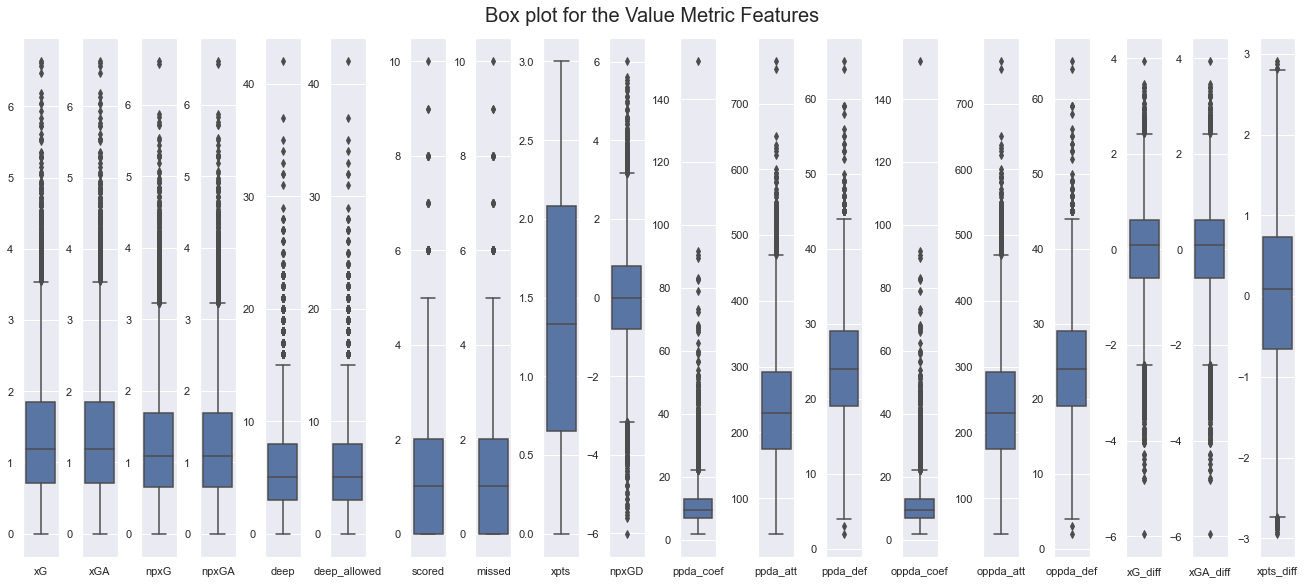

In [20]:
sns.set()

value = dfg[num_var2]
plot_features = value.columns
fig, axes = plt.subplots(1, len(plot_features), figsize=(18,8), constrained_layout=True)
j=0
k=1

for i in zip(axes, plot_features):
    sns.boxplot(data=value.iloc[:,j:k], ax=i[0])
    j=j+1
    k=k+1
    
plt.suptitle("Box plot for the Value Metric Features", fontsize=20)
plt.show()

# CLUSTER

xG - expected goals metric, it is a statistical measure of the quality of chances created and conceded. More at understat.com

xG_diff - difference between actual goals scored and expected goals.

npxG - expected goals without penalties and own goals.

xGA - expected goals against.

xGA_diff - difference between actual goals missed and expected goals against.

npxGA - expected goals against without penalties and own goals.

npxGD - difference between "for" and "against" expected goals without penalties and own goals.

ppda_coef - passes allowed per defensive action in the opposition half (power of pressure)

oppda_coef - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)

deep - passes completed within an estimated 20 yards of goal (crosses excluded)

deep_allowed - opponent passes completed within an estimated 20 yards of goal (crosses excluded)

In [21]:
var = ['xG','xGA','ppda_coef','oppda_coef','deep','deep_allowed','scored','missed']

In [22]:
# Creating a correlation heatmap
def cor_heatmap(cor):
    #plt.figure(figsize=(15,12))
    mask_ut=np.triu(np.ones(cor.shape)).astype(np.bool)
    mask_annot = np.absolute(cor.values) >= 0.9
    annot = np.where(mask_annot, cor.values, np.full(cor.shape,""))
    #ns.heatmap(data = cor, annot = annot, cmap = plt.cm.BuGn, fmt='.4')
    sns.heatmap(data = cor,mask=mask_ut, annot = annot, cmap = plt.cm.YlGn, fmt='.4')
    #sns.heatmap(data = cor, annot = annot, cmap = plt.cm.RdYlGn, fmt='.3')
    #ns.heatmap(data = cor, annot = annot, cmap = plt.cm.Spectral, fmt='.3)4
    plt.show()

In [23]:
dfs = dfs.rename(columns={'xG': 'Expected Goals', 'xGA': 'Expected Goals Against', 'ppda_coef': 'Passes Allowed Defending', 'oppda_coef': 'Passes Completed Attacking', 'deep': 'Dangerous Passes Completed', 'deep_allowed': 'Dangerous Passes Allowed'})
dfs

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,Expected Goals Against,xGA_diff,npxGA,npxGD,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,Bundesliga,2019,14,Augsburg,34,9,9,16,45,63,...,59.119342,-3.880658,58.361730,-18.294165,16.804008,8.402157,133,223,39.7766,3.7766
344,Bundesliga,2019,15,FC Cologne,34,10,6,18,51,69,...,54.544334,-14.455666,49.997671,-3.751162,11.448608,10.410441,167,226,43.8903,7.8903
345,Bundesliga,2019,16,Werder Bremen,34,8,7,19,42,69,...,56.939854,-12.060146,56.182084,-22.990440,12.852066,11.041743,186,205,35.1185,4.1185
346,Bundesliga,2019,17,Fortuna Duesseldorf,34,6,12,16,36,67,...,64.448134,-2.551866,60.659343,-27.999481,16.810429,11.745078,143,207,32.8686,2.8686


In [24]:
dfs['name'] = dfs['team']+' '+dfs['year'].astype(str) 

In [25]:
dfs['name']

0                Barcelona 2014
1              Real Madrid 2014
2          Atletico Madrid 2014
3                 Valencia 2014
4                  Sevilla 2014
                 ...           
343               Augsburg 2019
344             FC Cologne 2019
345          Werder Bremen 2019
346    Fortuna Duesseldorf 2019
347              Paderborn 2019
Name: name, Length: 348, dtype: object

In [26]:
final = ['name','Expected Goals','Expected Goals Against','Passes Allowed Defending','Passes Completed Attacking','Dangerous Passes Completed','Dangerous Passes Allowed','pts']
num_var=['Expected Goals','Expected Goals Against','Passes Allowed Defending','Passes Completed Attacking','Dangerous Passes Completed','Dangerous Passes Allowed']

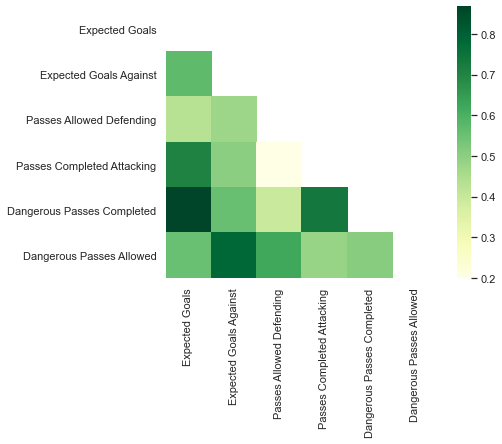

In [27]:
def heatmap(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 5))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.YlGn)
    plt.show()
        
heatmap(dfs[num_var].corr().abs()) 

In [28]:
df_norm = dfs[final].copy()

In [29]:
import statsmodels.api as sm

mod = sm.OLS(df_norm['pts'],df_norm[num_var])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pts   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              2034.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                   4.13e-264
Time:                        21:08:53   Log-Likelihood:                         -1251.4
No. Observations:                 348   AIC:                                      2515.
Df Residuals:                     342   BIC:                                      2538.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

### Using a Decision Tree
We get the normalized total reduction of the criterion (gini or entropy) brought by that feature (also known as Gini importance).

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [31]:
# Use StandardScaler to scale the data
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df_norm[num_var])
#scaled_feat

# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.mean_, "\n", scaler.var_)

df_norm[num_var] = scaled_feat
df_norm.head()

# Checking max and min of minmaxed variables
df_norm.describe().round(2)

Parameters fitted:
 [ 50.06290624  50.06290624  10.88119964  10.88119964 222.83045977
 222.83045977] 
 [2.10197717e+02 1.07978617e+02 7.18218767e+00 1.36922149e+01
 8.85448562e+03 2.75920401e+03]


,Expected Goals,Expected Goals Against,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,pts
count,348.00,348.00,348.00,348.00,348.00,348.00,348.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,50.63
std,1.00,1.00,1.00,1.00,1.00,1.00,17.11
min,-1.62,-2.82,-1.94,-1.75,-1.40,-2.66,16.00
25%,-0.70,-0.64,-0.68,-0.62,-0.66,-0.72,39.00
50%,-0.22,0.04,-0.16,-0.18,-0.31,-0.05,47.00
75%,0.35,0.68,0.57,0.30,0.32,0.67,60.25
max,4.38,2.77,4.11,5.29,3.82,2.55,100.00


In [32]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [33]:
# Preparing the data
X = df_norm[num_var]
y = df_norm['pts']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5
)

In [34]:
# Fitting the decision tree
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 65.93% of the customers correctly


In [35]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

Expected Goals                0.778982
Expected Goals Against        0.110780
Passes Allowed Defending      0.000000
Passes Completed Attacking    0.000000
Dangerous Passes Completed    0.110238
Dangerous Passes Allowed      0.000000
dtype: float64

In [36]:
# Predicting the cluster labels of the outliers
df_norm['PredictedPoints'] = dt.predict(df_norm[num_var])
df_norm.head()

,name,Expected Goals,Expected Goals Against,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,pts,PredictedPoints
0,Barcelona 2014,3.649919,-2.080458,-1.939456,1.482689,2.828634,-2.071851,94,87.000000
1,Real Madrid 2014,3.152346,-0.717497,-0.250793,0.553553,1.362082,-1.329392,92,87.000000
2,Atletico Madrid 2014,0.481768,-2.020329,-0.708656,-0.444318,-0.274505,-1.900514,78,66.642857
3,Valencia 2014,0.344842,-1.026855,-0.810226,-0.813711,-0.210742,-0.967681,77,66.642857
4,Sevilla 2014,1.342492,-0.211732,-0.972049,-0.379265,0.873231,-1.043830,76,66.642857


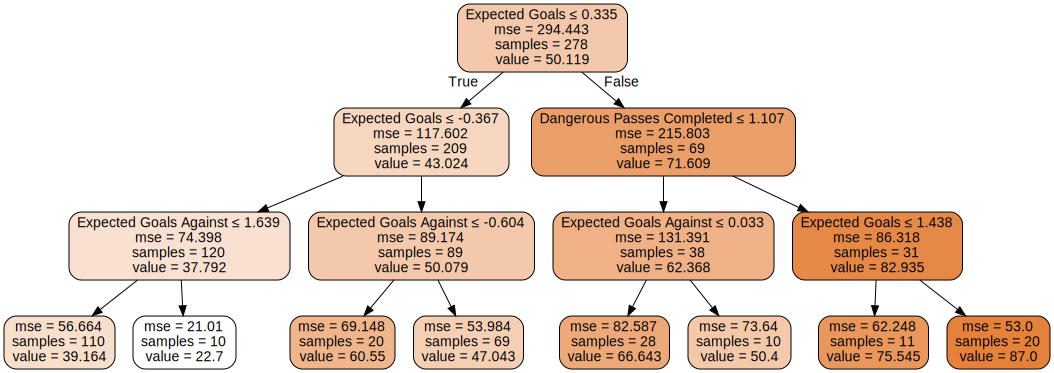

In [37]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graphviz.Source(dot_data)

In [38]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    affinity='euclidean'
)

### Finding the optimal clusterer on demographic variables

In [39]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_norm[num_var], kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_norm[num_var], hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

,kmeans,complete,average,single,ward
2,0.417030,0.391057,0.339174,0.102369,0.376246
3,0.568083,0.465948,0.355198,0.107018,0.553866
4,0.632020,0.537111,0.384600,0.108321,0.606617
5,0.669084,0.612833,0.495964,0.112479,0.642708
6,0.696771,0.655281,0.633146,0.164930,0.677308
7,0.719036,0.672278,0.640354,0.176432,0.699075
8,0.740070,0.683466,0.651205,0.177085,0.717965
9,0.754793,0.703649,0.658445,0.182202,0.732971


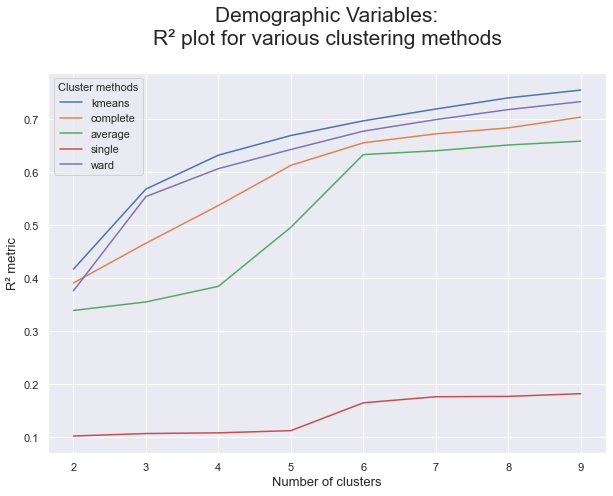

In [40]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [41]:
# Final Kmeans clustering solution
number_clusters = 3
kmeans = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmeans.fit_predict(df_norm[num_var])
km_labels

# Characterizing the final clusters
df_concat = pd.concat((df_norm, pd.Series(km_labels.astype(int), name='kmeans labels')), axis=1)
df_centroids = df_concat.groupby('kmeans labels').mean()
df_centroids

,Expected Goals,Expected Goals Against,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,pts,PredictedPoints
kmeans labels,,,,,,,,
0,-0.571645,0.758893,0.801277,-0.362393,-0.519737,0.868183,39.358621,40.892455
1,1.945661,-1.406146,-0.774650,1.817820,2.053557,-1.324738,80.466667,81.231169
2,-0.029533,-0.295968,-0.514721,-0.185157,-0.107900,-0.419451,52.468354,50.969769


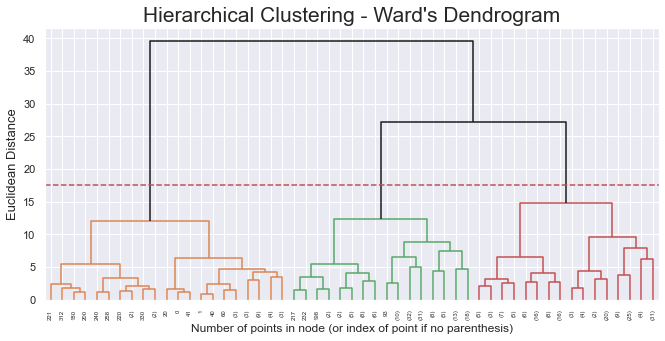

In [42]:
# Setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hc_sociodem = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hc_sociodem.fit_predict(df_norm[num_var])

# Dendrogram

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hc_sociodem.children_.shape[0])
n_samples = len(hc_sociodem.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hc_sociodem.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hc_sociodem.children_, hc_sociodem.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 17.5
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [43]:
df_concat

,name,Expected Goals,Expected Goals Against,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,pts,PredictedPoints,kmeans labels
0,Barcelona 2014,3.649919,-2.080458,-1.939456,1.482689,2.828634,-2.071851,94,87.000000,1
1,Real Madrid 2014,3.152346,-0.717497,-0.250793,0.553553,1.362082,-1.329392,92,87.000000,1
2,Atletico Madrid 2014,0.481768,-2.020329,-0.708656,-0.444318,-0.274505,-1.900514,78,66.642857,2
3,Valencia 2014,0.344842,-1.026855,-0.810226,-0.813711,-0.210742,-0.967681,77,66.642857,2
4,Sevilla 2014,1.342492,-0.211732,-0.972049,-0.379265,0.873231,-1.043830,76,66.642857,2
...,...,...,...,...,...,...,...,...,...,...
343,Augsburg 2019,-0.428085,0.871542,2.210036,-0.669957,-0.954645,0.003228,36,39.163636,0
344,FC Cologne 2019,-0.054170,0.431268,0.211723,-0.127222,-0.593321,0.060340,36,47.043478,0
345,Werder Bremen 2019,-0.850090,0.661800,0.735409,0.043387,-0.391404,-0.339446,31,39.163636,0
346,Fortuna Duesseldorf 2019,-0.991319,1.384356,2.212432,0.233462,-0.848373,-0.301371,30,39.163636,0


In [44]:
df_concat[df_concat.name.str.contains('Dortmund')]

,name,Expected Goals,Expected Goals Against,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,pts,PredictedPoints,kmeans labels
246,Borussia Dortmund 2014,0.262143,-1.603899,-1.215969,0.479630,0.735078,-2.109926,46,60.550000,2
259,Borussia Dortmund 2015,2.300102,-2.009899,-1.187450,2.028275,1.744660,-1.843402,78,87.000000,1
278,Borussia Dortmund 2016,1.713700,-1.487539,-1.130193,0.824811,0.990130,-1.139018,64,66.642857,1
298,Borussia Dortmund 2017,1.106002,-0.886024,-0.879502,1.225522,0.703196,-0.967681,55,66.642857,1
313,Borussia Dortmund 2018,1.029886,-0.691681,1.373035,1.268311,0.480025,-1.215167,76,66.642857,2
331,Borussia Dortmund 2019,0.979346,-0.773552,0.462932,2.115898,0.788214,-1.672065,69,66.642857,1


In [45]:
df_concat

,name,Expected Goals,Expected Goals Against,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,pts,PredictedPoints,kmeans labels
0,Barcelona 2014,3.649919,-2.080458,-1.939456,1.482689,2.828634,-2.071851,94,87.000000,1
1,Real Madrid 2014,3.152346,-0.717497,-0.250793,0.553553,1.362082,-1.329392,92,87.000000,1
2,Atletico Madrid 2014,0.481768,-2.020329,-0.708656,-0.444318,-0.274505,-1.900514,78,66.642857,2
3,Valencia 2014,0.344842,-1.026855,-0.810226,-0.813711,-0.210742,-0.967681,77,66.642857,2
4,Sevilla 2014,1.342492,-0.211732,-0.972049,-0.379265,0.873231,-1.043830,76,66.642857,2
...,...,...,...,...,...,...,...,...,...,...
343,Augsburg 2019,-0.428085,0.871542,2.210036,-0.669957,-0.954645,0.003228,36,39.163636,0
344,FC Cologne 2019,-0.054170,0.431268,0.211723,-0.127222,-0.593321,0.060340,36,47.043478,0
345,Werder Bremen 2019,-0.850090,0.661800,0.735409,0.043387,-0.391404,-0.339446,31,39.163636,0
346,Fortuna Duesseldorf 2019,-0.991319,1.384356,2.212432,0.233462,-0.848373,-0.301371,30,39.163636,0


In [46]:
#####
from sklearn.decomposition import PCA

In [47]:
df_pca = df_concat.copy()

In [48]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[num_var])
pca_feat  # What is this output?

array([[ 5.81661882,  0.18887501, -0.87984076, -0.94241179,  0.45226539,
        -0.41021179],
       [ 3.16443911,  0.7563032 , -0.48105723, -1.03569673,  1.33426431,
        -0.87973898],
       [ 1.78255143, -1.85995312,  1.20238976, -0.62084963,  0.3386656 ,
        -0.34343256],
       ...,
       [-0.90386652,  0.11750642,  0.54725804,  0.59553386,  0.5068871 ,
         0.47947115],
       [-1.88206817,  1.0906814 ,  1.23284941,  0.82638076,  1.24175204,
         0.42724399],
       [-2.76034945,  0.93552545, -0.14011518,  0.35858481,  0.27266007,
        -0.25114424]])

In [49]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,3.845928,0.000000,0.639146,0.639146
2,1.030560,-2.815368,0.171266,0.810412
3,0.545798,-0.484761,0.090705,0.901117
4,0.286366,-0.259432,0.047591,0.948708
5,0.183592,-0.102774,0.030511,0.979219
6,0.125047,-0.058544,0.020781,1.000000


In [50]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(df_pca[num_var])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1
0,5.816619,0.188875
1,3.164439,0.756303
2,1.782551,-1.859953
3,0.832513,-1.488384
4,1.672398,-0.551028
...,...,...
343,-1.946003,0.777801
344,-0.608092,-0.019701
345,-0.903867,0.117506
346,-1.882068,1.090681


In [51]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

,name,Expected Goals,Expected Goals Against,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,pts,PredictedPoints,kmeans labels,PC0,PC1
0,Barcelona 2014,3.649919,-2.080458,-1.939456,1.482689,2.828634,-2.071851,94,87.000000,1,5.816619,0.188875
1,Real Madrid 2014,3.152346,-0.717497,-0.250793,0.553553,1.362082,-1.329392,92,87.000000,1,3.164439,0.756303
2,Atletico Madrid 2014,0.481768,-2.020329,-0.708656,-0.444318,-0.274505,-1.900514,78,66.642857,2,1.782551,-1.859953
3,Valencia 2014,0.344842,-1.026855,-0.810226,-0.813711,-0.210742,-0.967681,77,66.642857,2,0.832513,-1.488384
4,Sevilla 2014,1.342492,-0.211732,-0.972049,-0.379265,0.873231,-1.043830,76,66.642857,2,1.672398,-0.551028


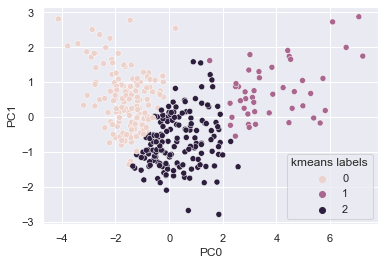

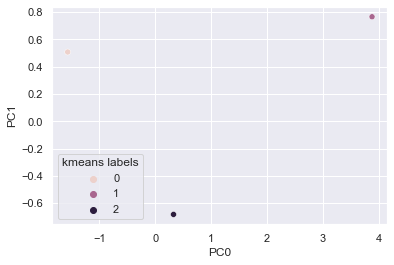

In [52]:

sns.scatterplot(data=df_pca, x="PC0", y="PC1", hue="kmeans labels")
plt.show()
sns.scatterplot(data=df_pca.groupby('kmeans labels').mean(), x="PC0", y="PC1", hue="kmeans labels")
plt.show()

In [53]:
def correspondence_analysis(cat_df, row_cats=None, mca=False, dim_plot=False, ret_dim=2, assess=False, normalization="row_principal"):
    """
    This function performs simple or multiple correspondence analysis and outputs the corresponding perceptual map, which can be used to interpret the associations between categories.
    """
    # FORM INPUT MATRIX
    cat_labels = cat_df.columns
    if mca:
        Z = cat_df.values
        input_matrix = Z.T@Z # Burt Table
    else:
        input_matrix = cat_df.loc[:,row_cats].values.T @ cat_df.loc[:,[i for i in cat_labels if i not in row_cats]].values # Contigency table
        
    # FROM INPUT MATRIX TO CHI-SQ VALUES
    n = np.sum(input_matrix)  # grand total
    P = input_matrix / n  # correspondence matrix/ frequency table
    rt = np.expand_dims(np.sum(P, axis=1), axis=1)  # row totals
    ct = np.expand_dims(np.sum(P, axis=0), axis=1)  # column totals
    RP = np.diag(rt[:, 0] ** -1) @ P  # row profile table
    CP = np.diag(ct[:, 0] ** -1) @ P.T  # columns profile table
    E = rt @ ct.T  # independence model/ expected proportions
    R = P - E  # residuals/ difference between observed and expected proportions
    CS = (R ** 2) / E  # chi-sq values

    # CHI-SQ TEST OF INDEPENDENCE OF COLUMNS AND ROWS
    Csqs = n * np.sum(CS)  # Chi-sq statistic
    inertia = Csqs / n  # total inertia of Fm
    df = (input_matrix.shape[0] - 1) * (input_matrix.shape[1] - 1)  # df for test of independence
    p_value = 1 - chi2.cdf(Csqs, df)  # p-value for independence test of employees and smoking habits
    print("The Chi-square test of independence has a p-value of {0:.2f}".format(p_value))
    
    # DECOMPOSING THE STANDARDIZED RESIDUALS MATRIX
    I = R / E  # indexed residuals - tells us the association between 2 categories comparing to what would be expected
    Z = I * (E ** 0.5)  # standardized residuals (sqrt of CS)
    U, s, v = svd(Z, full_matrices=False)  # singular values decomposition of Z
    V = v.T
    S = np.diag(s)
    
    # DETERMINING NUMBER OF DIMENSIONS TO RETAIN
    max_dim = np.min(input_matrix.shape) - 1  # maximum number of dimensions possible
    inrt_dim = np.diag(S)[:max_dim] ** 2  # inertia retained by each dim
    perc_inrt = inrt_dim / inertia  # proportion inertia retained by each dim
    cumul_inrt = np.cumsum(perc_inrt)  # cumulative inertia retained by each dim
    expect_inrt = inertia / max_dim  # expected inertia for each dim
    print("The proportion of Inertia retained with {0} dimensions is {1:.2f}".format(ret_dim, cumul_inrt[ret_dim-1]))
    
    if dim_plot:
        # Figure
        sns.set(style="dark")
        fig, ax1 = plt.subplots(figsize=(16, 8))
        # Traces
        x = np.arange(1, max_dim+1)
        ax2 = ax1.twinx()
        ax2.plot(x, cumul_inrt, color='r', marker='o', linewidth=2.5, label='Cumulative Proportion of Inertia')
        ax1.bar(x, height=inrt_dim, label='Inertia by Dimension')
        ax1.axhline(expect_inrt, color='k', linestyle="--", label="Expect Inertia by Dimension")
        # Layout
        ax1.set_ylabel('Inertia')
        ax2.set_ylabel('Cumulative Proportion of Inertia')
        ax1.set_xlabel('Dimensions')
        ax1.set_title('Inertia Over Dimensions', fontsize=18, pad=20)
        handles1, labels1 = ax1.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        plt.legend(handles1 + handles2, labels1 + labels2, loc='upper left')  # build legend
        plt.xticks(x, list(map(lambda i: str(i), list(x))))
        # Show figure
        plt.show()
    
    if normalization == "row_principal":
        # COMPUTING ROW SCORES
        row_scores = np.diag(rt[:, 0] ** -0.5) @ U  # standard coordinates
        row_scores = (row_scores @ S)[:, :max_dim]  # applying principal normalization
        ret_rscr = row_scores[:, 0:ret_dim]

        # COMPUTING COLUMN SCORES
        col_scores = np.diag(ct[:, 0] ** -0.5) @ V  # standard coordinates
        col_scores = col_scores[:, :max_dim]  # no normalization (row principal normalization)
        # col_scores = (col_scores @ S)[:, :max_dim]  # applying principal normalization
        ret_cscr = col_scores[:, 0:ret_dim]
    else:
        print("Not implemented")
        return True
    
    if not assess:
        return ret_rscr, ret_cscr
    else:
        # PM REPRESENTATION QUALITY ASSESSMENT
        row_inert = np.sum(CS, axis=1)  # inertia by rows
        col_inert = np.sum(CS, axis=0)  # inertia by columns
        row_mass = rt  # mass of rows
        col_mass = ct  # mass of columns
        eigval = (S @ S.T)[:max_dim, :max_dim]  # Getting eigenvalues (inertia accounted by each dimension)
        ret_var = np.sum(np.diag(eigval)[:ret_dim]) / np.sum(np.diag(eigval))  # % inertia retained by retained dimensions
        base = np.append(row_scores, col_scores, axis=0) ** 2
        sq_cosines = np.diag(1 / np.sum(base, axis=1)) @ base
        # squared cosines: proportion of categories variation accounted by each dim (analogous to communalities in FA)
        abs_ctrb = np.diag(np.append(row_mass, col_mass, axis=0)[:, 0]) @ base @ np.diag(np.diag(eigval) ** -1)
        # absolute contributions: proportion of dimension's inertia attributable to each category
        quality = np.sum(sq_cosines[:, :ret_dim], axis=1)  # representation of each category overall
        
        #SUMMARY OF QUALITY OF PM
        summary_df = pd.DataFrame(np.concatenate((np.expand_dims(np.append(row_inert/inertia, col_inert/inertia), axis=1),
                                          np.expand_dims(np.append(row_mass, col_mass), axis=1),
                                          np.expand_dims(quality, axis=1),
                                          np.append(row_scores[:, :ret_dim], col_scores[:, :ret_dim], axis=0),
                                          sq_cosines[:, :ret_dim],
                                          abs_ctrb[:, :ret_dim]), axis=1),
                          columns=["Prop inertia","Mass","Quality","D1","D2","SqC1","SqC2","Ctr1","Ctr2"],
                          index=cat_labels)
        return ret_rscr, ret_cscr, summary_df

In [54]:
####
# CORRESPONDENCE ANALYSIS
from numpy.linalg import svd
from scipy.spatial import distance_matrix
from scipy.stats import chi2

In [55]:
df_concat

,name,Expected Goals,Expected Goals Against,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,pts,PredictedPoints,kmeans labels
0,Barcelona 2014,3.649919,-2.080458,-1.939456,1.482689,2.828634,-2.071851,94,87.000000,1
1,Real Madrid 2014,3.152346,-0.717497,-0.250793,0.553553,1.362082,-1.329392,92,87.000000,1
2,Atletico Madrid 2014,0.481768,-2.020329,-0.708656,-0.444318,-0.274505,-1.900514,78,66.642857,2
3,Valencia 2014,0.344842,-1.026855,-0.810226,-0.813711,-0.210742,-0.967681,77,66.642857,2
4,Sevilla 2014,1.342492,-0.211732,-0.972049,-0.379265,0.873231,-1.043830,76,66.642857,2
...,...,...,...,...,...,...,...,...,...,...
343,Augsburg 2019,-0.428085,0.871542,2.210036,-0.669957,-0.954645,0.003228,36,39.163636,0
344,FC Cologne 2019,-0.054170,0.431268,0.211723,-0.127222,-0.593321,0.060340,36,47.043478,0
345,Werder Bremen 2019,-0.850090,0.661800,0.735409,0.043387,-0.391404,-0.339446,31,39.163636,0
346,Fortuna Duesseldorf 2019,-0.991319,1.384356,2.212432,0.233462,-0.848373,-0.301371,30,39.163636,0


In [56]:
ohe = OneHotEncoder()  # One-hot encode cluster labels
mca_df = pd.DataFrame(ohe.fit_transform(df_concat.loc[:, ["kmeans labels"]]).toarray(),
                              index=df_concat.index, columns=["cluster_0", "cluster_1", "cluster_2"])

In [57]:
row_scores, _ = correspondence_analysis(mca_df, mca=True)  # Correspondence Analysis - we only need either the row or column scores as rows and columns are the same in a Burt table
mca_cord = pd.DataFrame(row_scores, index=["cluster_0","cluster_1","cluster_2"],
                         columns=["Dim1", "Dim2"])

The Chi-square test of independence has a p-value of 0.00
The proportion of Inertia retained with 2 dimensions is 1.00


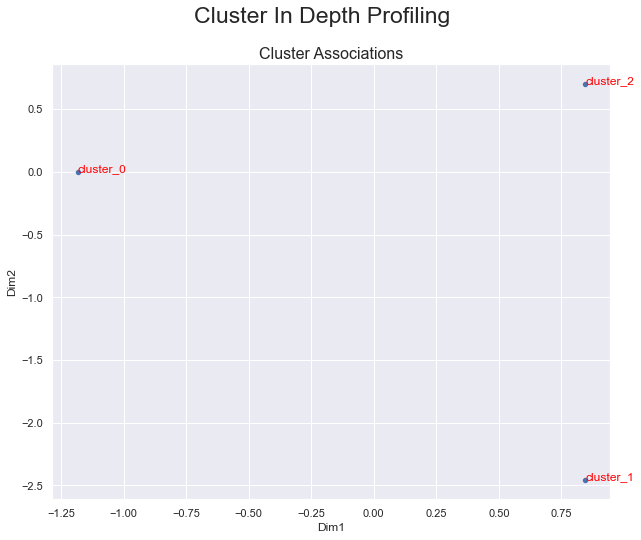

In [58]:
# Figure
sns.set()
fig, ax = plt.subplots(1,figsize=(10,8))

# Traces
sns.scatterplot(x="Dim1", y="Dim2", data=mca_cord, ax=ax)
for i in mca_cord.index:
    if "cluster" in i:
        ax.text(mca_cord.loc[i, "Dim1"], mca_cord.loc[i, "Dim2"], i, horizontalalignment='left', size='medium', color='red')
    else:
        ax.text(mca_cord.loc[i, "Dim1"], mca_cord.loc[i, "Dim2"], i, horizontalalignment='left', size='medium', color='black')

#Layout
#handles, _ = ax1.get_legend_handles_labels()
#cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
#ax.axhline(y=0, color='k', linewidth=1)
#ax.axvline(x=0, color='k', linewidth=1)
ax.set_title("Cluster Associations", fontsize=16)
plt.suptitle("Cluster In Depth Profiling", fontsize=23)

plt.show()

In [59]:
dfg = dfg.rename(columns={'xG': 'Expected Goals', 'xGA': 'Expected Goals Against', 'ppda_coef': 'Passes Allowed Defending', 'oppda_coef': 'Passes Completed Attacking', 'deep': 'Dangerous Passes Completed', 'deep_allowed': 'Dangerous Passes Allowed'})
dfg

,league,year,h_a,Expected Goals,Expected Goals Against,npxG,npxGA,Dangerous Passes Completed,Dangerous Passes Allowed,scored,...,Passes Allowed Defending,ppda_att,ppda_def,Passes Completed Attacking,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.570120,0.198420,-0.6514
1,Bundesliga,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.503280,0.307950,0.5143
2,Bundesliga,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.770130,0.310166,-0.8412
3,Bundesliga,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.035190,0.203118,1.1367
4,Bundesliga,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.517140,0.402844,-0.0713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12787,La_liga,2019,a,0.595505,2.651750,0.595505,1.908600,4,18,0,...,14.684211,279,19,9.379310,272,29,Mallorca,0.595505,-0.348250,0.1961
12788,La_liga,2019,h,1.489830,1.008000,1.489830,1.008000,4,4,2,...,10.043478,231,23,5.294118,180,34,Mallorca,-0.510170,1.008000,-1.2219
12789,La_liga,2019,a,0.309223,1.912250,0.309223,1.168970,2,8,0,...,17.210526,327,19,6.413793,186,29,Mallorca,0.309223,-0.087750,0.2220
12790,La_liga,2019,h,1.217910,1.092780,1.217910,1.092780,3,9,1,...,9.500000,171,18,7.000000,210,30,Mallorca,0.217910,-0.907220,1.4535


In [70]:
df  = dfg.copy()

In [71]:
X = df_centroids[num_var]
y = df_centroids.index

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)

pred = neigh.predict(df[num_var])

In [72]:
df['Game Tactics'] = pred

In [73]:
df['name'] = df['team']+' '+df['year'].astype(str) 

In [74]:
df[df.name.str.contains('Bayern Munich 2014')]

,league,year,h_a,Expected Goals,Expected Goals Against,npxG,npxGA,Dangerous Passes Completed,Dangerous Passes Allowed,scored,...,ppda_def,Passes Completed Attacking,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,Game Tactics,name
0,Bundesliga,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,...,24,21.850000,437,20,Bayern Munich,0.570120,0.198420,-0.6514,1,Bayern Munich 2014
1,Bundesliga,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,...,41,17.695652,407,23,Bayern Munich,0.503280,0.307950,0.5143,1,Bayern Munich 2014
2,Bundesliga,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,...,33,16.961538,441,26,Bayern Munich,-0.770130,0.310166,-0.8412,1,Bayern Munich 2014
3,Bundesliga,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,...,26,9.446809,444,47,Bayern Munich,1.035190,0.203118,1.1367,1,Bayern Munich 2014
4,Bundesliga,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,...,40,44.800000,448,10,Bayern Munich,-0.517140,0.402844,-0.0713,1,Bayern Munich 2014
5,Bundesliga,2014,a,3.469660,0.821798,3.469660,0.821798,27,0,2,...,25,44.090909,485,11,Bayern Munich,1.469660,0.821798,-0.1862,1,Bayern Munich 2014
6,Bundesliga,2014,h,2.698790,0.443178,2.698790,0.443178,14,5,4,...,17,52.375000,419,8,Bayern Munich,-1.301210,0.443178,-0.2675,1,Bayern Munich 2014
7,Bundesliga,2014,h,2.498260,0.000000,1.740490,0.000000,16,0,6,...,30,28.800000,432,15,Bayern Munich,-3.501740,0.000000,-0.0608,1,Bayern Munich 2014
8,Bundesliga,2014,a,1.204700,0.648384,1.204700,0.648384,5,7,0,...,20,26.857143,376,14,Bayern Munich,1.204700,0.648384,0.8346,1,Bayern Munich 2014
9,Bundesliga,2014,h,2.643670,0.942884,1.886050,0.942884,11,3,2,...,31,13.400000,402,30,Bayern Munich,0.643670,-0.057116,-0.5044,1,Bayern Munich 2014


In [75]:
df_concat[df_concat.name.str.contains('Bayern Munich 2014')]

,name,Expected Goals,Expected Goals Against,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,pts,PredictedPoints,kmeans labels
240,Bayern Munich 2014,1.113438,-2.706518,-1.910373,3.821723,1.755288,-2.662011,79,75.545455,1


In [76]:
aaa = df.merge(df_concat.loc[:,['name','kmeans labels']],left_on='name',right_on='name')
aaa

,league,year,h_a,Expected Goals,Expected Goals Against,npxG,npxGA,Dangerous Passes Completed,Dangerous Passes Allowed,scored,...,Passes Completed Attacking,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,Game Tactics,name,kmeans labels
0,Bundesliga,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,...,21.850000,437,20,Bayern Munich,0.570120,0.198420,-0.6514,1,Bayern Munich 2014,1
1,Bundesliga,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,...,17.695652,407,23,Bayern Munich,0.503280,0.307950,0.5143,1,Bayern Munich 2014,1
2,Bundesliga,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,...,16.961538,441,26,Bayern Munich,-0.770130,0.310166,-0.8412,1,Bayern Munich 2014,1
3,Bundesliga,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,...,9.446809,444,47,Bayern Munich,1.035190,0.203118,1.1367,1,Bayern Munich 2014,1
4,Bundesliga,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,...,44.800000,448,10,Bayern Munich,-0.517140,0.402844,-0.0713,1,Bayern Munich 2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12787,La_liga,2019,a,0.595505,2.651750,0.595505,1.908600,4,18,0,...,9.379310,272,29,Mallorca,0.595505,-0.348250,0.1961,0,Mallorca 2019,0
12788,La_liga,2019,h,1.489830,1.008000,1.489830,1.008000,4,4,2,...,5.294118,180,34,Mallorca,-0.510170,1.008000,-1.2219,0,Mallorca 2019,0
12789,La_liga,2019,a,0.309223,1.912250,0.309223,1.168970,2,8,0,...,6.413793,186,29,Mallorca,0.309223,-0.087750,0.2220,0,Mallorca 2019,0
12790,La_liga,2019,h,1.217910,1.092780,1.217910,1.092780,3,9,1,...,7.000000,210,30,Mallorca,0.217910,-0.907220,1.4535,0,Mallorca 2019,0


In [77]:
aaa[aaa.name.str.contains('Bayern Munich 2014')]

,league,year,h_a,Expected Goals,Expected Goals Against,npxG,npxGA,Dangerous Passes Completed,Dangerous Passes Allowed,scored,...,Passes Completed Attacking,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,Game Tactics,name,kmeans labels
0,Bundesliga,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,...,21.850000,437,20,Bayern Munich,0.570120,0.198420,-0.6514,1,Bayern Munich 2014,1
1,Bundesliga,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,...,17.695652,407,23,Bayern Munich,0.503280,0.307950,0.5143,1,Bayern Munich 2014,1
2,Bundesliga,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,...,16.961538,441,26,Bayern Munich,-0.770130,0.310166,-0.8412,1,Bayern Munich 2014,1
3,Bundesliga,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,...,9.446809,444,47,Bayern Munich,1.035190,0.203118,1.1367,1,Bayern Munich 2014,1
4,Bundesliga,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,...,44.800000,448,10,Bayern Munich,-0.517140,0.402844,-0.0713,1,Bayern Munich 2014,1
5,Bundesliga,2014,a,3.469660,0.821798,3.469660,0.821798,27,0,2,...,44.090909,485,11,Bayern Munich,1.469660,0.821798,-0.1862,1,Bayern Munich 2014,1
6,Bundesliga,2014,h,2.698790,0.443178,2.698790,0.443178,14,5,4,...,52.375000,419,8,Bayern Munich,-1.301210,0.443178,-0.2675,1,Bayern Munich 2014,1
7,Bundesliga,2014,h,2.498260,0.000000,1.740490,0.000000,16,0,6,...,28.800000,432,15,Bayern Munich,-3.501740,0.000000,-0.0608,1,Bayern Munich 2014,1
8,Bundesliga,2014,a,1.204700,0.648384,1.204700,0.648384,5,7,0,...,26.857143,376,14,Bayern Munich,1.204700,0.648384,0.8346,1,Bayern Munich 2014,1
9,Bundesliga,2014,h,2.643670,0.942884,1.886050,0.942884,11,3,2,...,13.400000,402,30,Bayern Munich,0.643670,-0.057116,-0.5044,1,Bayern Munich 2014,1


In [102]:
aaa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12792 entries, 0 to 12791
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   league                      12792 non-null  object 
 1   year                        12792 non-null  int64  
 2   h_a                         12792 non-null  object 
 3   Expected Goals              12792 non-null  float64
 4   Expected Goals Against      12792 non-null  float64
 5   npxG                        12792 non-null  float64
 6   npxGA                       12792 non-null  float64
 7   Dangerous Passes Completed  12792 non-null  int64  
 8   Dangerous Passes Allowed    12792 non-null  int64  
 9   scored                      12792 non-null  int64  
 10  missed                      12792 non-null  int64  
 11  xpts                        12792 non-null  float64
 12  result                      12792 non-null  object 
 13  date                        127

In [79]:
aaa['Did They Change?'] = abs(aaa['Game Tactics'] - aaa['kmeans labels'])

In [84]:
aaa['Did They Change?'].replace(to_replace=2, value=1, inplace=True)

In [85]:
variaveis = ['Expected Goals',
 'Expected Goals Against',
 'Passes Allowed Defending',
 'Passes Completed Attacking',
 'Dangerous Passes Completed',
 'Dangerous Passes Allowed',
 'Did They Change?']

In [100]:
mod = sm.OLS(aaa['pts'],aaa[variaveis])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pts   R-squared (uncentered):                   0.667
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              3652.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                        0.00
Time:                        21:43:03   Log-Likelihood:                         -19391.
No. Observations:               12792   AIC:                                  3.880e+04
Df Residuals:                   12785   BIC:                                  3.885e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

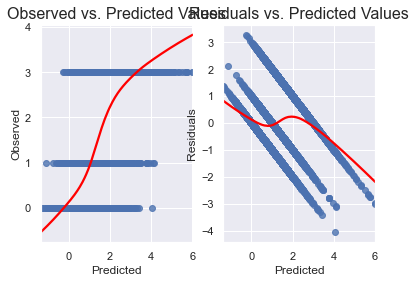

In [101]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(res, aaa['pts'])

In [88]:
res.resid.mean()

0.07293949563477603

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(aaa[variaveis].values, i) for i in range(aaa[variaveis].shape[1])]
pd.DataFrame({'vif': vif[1:]}).T

,0,1,2,3,4,5
vif,4.545008,4.157707,4.247464,4.78522,4.769058,2.104018



 Breusch-Pagan test ----
                                     value
Lagrange multiplier statistic  4949.151511
p-value                           0.000000
f-value                        1152.549579
f p-value                         0.000000

 Goldfeld-Quandt test ----
                value
F statistic  1.013975
p-value      0.289581

 Residuals plots ----


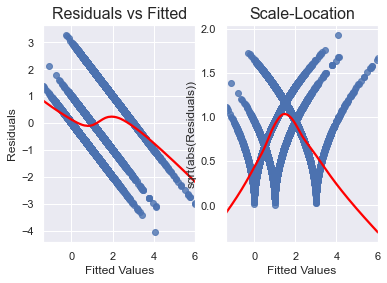

In [104]:
import statsmodels.stats.api as sms
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(res)

# t-test 

In [105]:
df_centroids

,Expected Goals,Expected Goals Against,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,pts,PredictedPoints
kmeans labels,,,,,,,,
0,-0.571645,0.758893,0.801277,-0.362393,-0.519737,0.868183,39.358621,40.892455
1,1.945661,-1.406146,-0.774650,1.817820,2.053557,-1.324738,80.466667,81.231169
2,-0.029533,-0.295968,-0.514721,-0.185157,-0.107900,-0.419451,52.468354,50.969769


In [113]:
import scipy
x = np.linspace(-4, 4, 160)
y1 = scipy.stats.norm(df_centroids.iloc[0,6])
y2 = scipy.stats.norm(df_centroids.iloc[1,6])
y3 = scipy.stats.norm(df_centroids.iloc[2,6])

#sns.displot(penguins, x="flipper_length_mm", kind="kde")

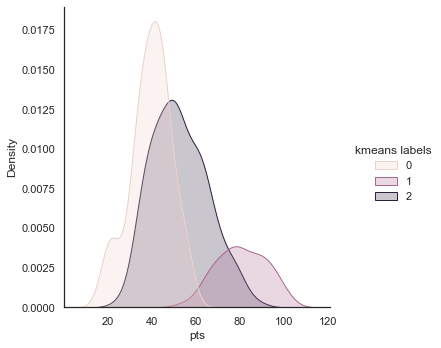

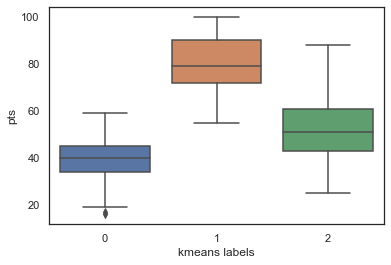

In [197]:
#sns.displot(df_concat, x="pts", hue="kmeans labels", kind="kde", fill=True)

with sns.axes_style("white"):
    #f, ax = plt.subplots()
    for item in [f, ax]:
        item.patch.set_visible(False)
    sns.displot(df_concat, x="pts", hue="kmeans labels", kind="kde", fill=True)
    plt.show()
    sns.boxplot(x="kmeans labels", y="pts", data=df_concat)
    plt.show()

In [169]:
def is0(x):
    if x == 0:
        return 1
    else:
        return 0
df_concat['Dummy - 0'] = df_concat['kmeans labels'].apply(is0)

def is1(x):
    if x == 1:
        return 1
    else:
        return 0
df_concat['Dummy - 1'] = df_concat['kmeans labels'].apply(is1)

def is2(x):
    if x == 2:
        return 1
    else:
        return 0
df_concat['Dummy - 2'] = df_concat['kmeans labels'].apply(is2)

In [172]:
df_concat.columns

Index(['name', 'Expected Goals', 'Expected Goals Against',
       'Passes Allowed Defending', 'Passes Completed Attacking',
       'Dangerous Passes Completed', 'Dangerous Passes Allowed', 'pts',
       'PredictedPoints', 'kmeans labels', 'Dummy - 0', 'Dummy - 1',
       'Dummy - 2'],
      dtype='object')

In [185]:
bbbvar = ['Expected Goals', 'Expected Goals Against',
       #'Passes Allowed Defending', 'Passes Completed Attacking',
       #'Dangerous Passes Completed', 
          'Dangerous Passes Allowed',
       'PredictedPoints','Dummy - 0', 'Dummy - 1',
       'Dummy - 2']
dummy =['Dummy - 0', 'Dummy - 1',
       'Dummy - 2']

In [186]:
mod = sm.OLS(df_concat['pts'],df_concat[bbbvar])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    pts   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     280.2
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          1.59e-128
Time:                        23:35:17   Log-Likelihood:                -1171.7
No. Observations:                 348   AIC:                             2357.
Df Residuals:                     341   BIC:                             2384.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Expected Goals          

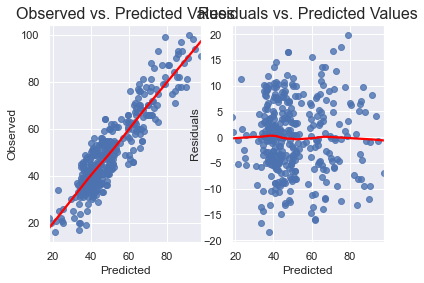

In [187]:
linearity_test(res, df_concat['pts'])

In [188]:
res.resid.mean()

2.134690891486163e-14


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  15.327642
p-value                         0.017856
f-value                         2.618555
f p-value                       0.017033

 Goldfeld-Quandt test ----
                value
F statistic  0.851098
p-value      0.850747

 Residuals plots ----


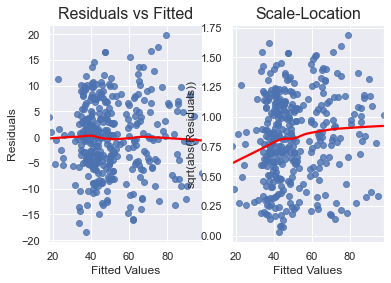

In [189]:
homoscedasticity_test(res)